In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import re
import util

%matplotlib inline

In [2]:
path = "DATA/IR VIS HAK/"

imgs_rgb, imgs_ir = util.loadDataset2(path, "SAVE_2_visible_noBlack_frames", "SAVE_2_IR0_noBlack_frames")

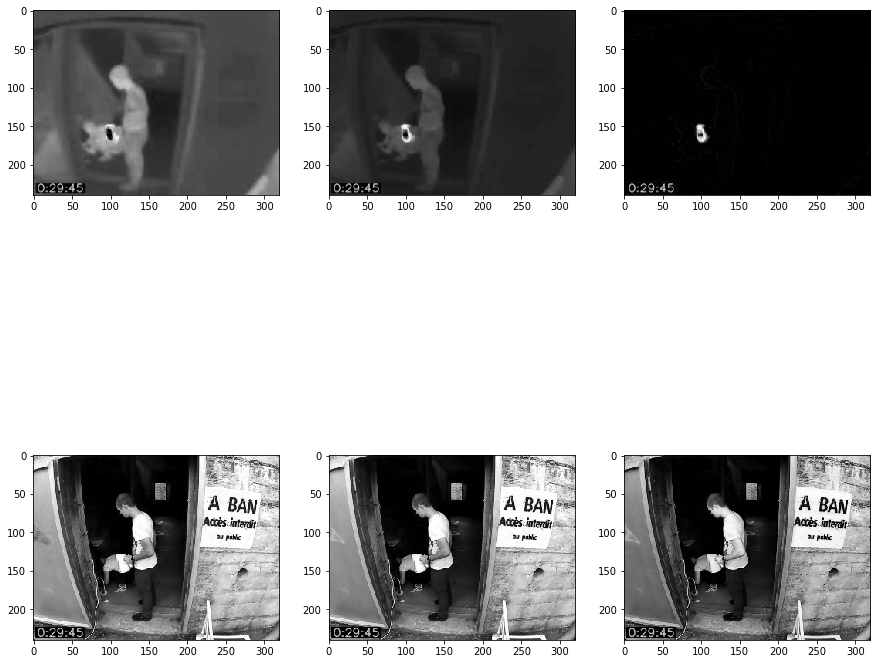

In [36]:
b_channel, g_channel, r_channel = cv2.split(imgs_rgb[5731])
b_channel2, g_channel2, r_channel2 = cv2.split(imgs_ir[5731])

plt.figure(figsize=(15, 15))
plt.subplot(231)
plt.imshow(b_channel2, cmap='gray')

plt.subplot(232)
plt.imshow(g_channel2, cmap='gray')

plt.subplot(233)
plt.imshow(r_channel2, cmap='gray')

plt.subplot(234)
plt.imshow(b_channel, cmap='gray')

plt.subplot(235)
plt.imshow(g_channel, cmap='gray')

plt.subplot(236)
plt.imshow(r_channel, cmap='gray')

In [4]:
alpha_channel1 = np.ones(b_channel.shape, dtype=b_channel.dtype) * 100
img_BGRA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel1))

alpha_channel2 = np.ones(b_channel.shape, dtype=b_channel.dtype) * 30
img2_BGRA = cv2.merge((b_channel2, g_channel2, r_channel2, alpha_channel2))

In [5]:
img_BGRA.shape
img = img_BGRA + img2_BGRA

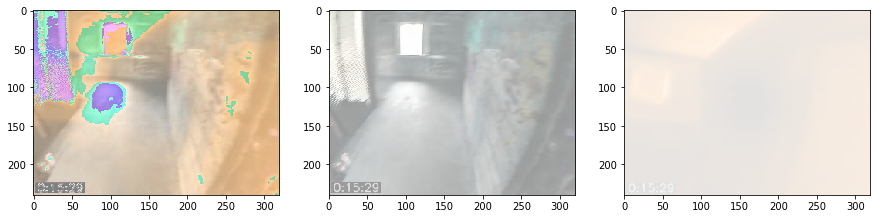

In [6]:
plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(img_BGRA)

plt.subplot(133)
plt.imshow(img2_BGRA)

In [7]:
no = 340
res = cv2.addWeighted(imgs_rgb[no], 0.65, imgs_ir[no], 0.35, 0)

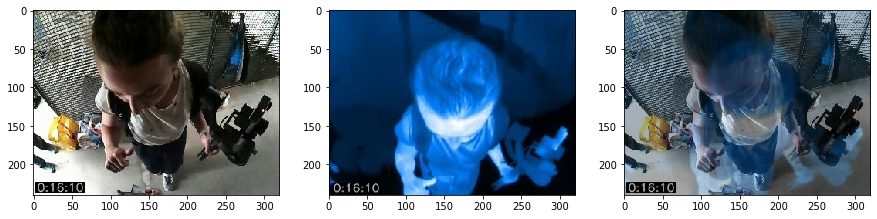

In [8]:
plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(cv2.cvtColor(imgs_rgb[no], cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(imgs_ir[no], cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [9]:
res = []
for i in range(imgs_rgb.shape[0]):
    res.append(cv2.addWeighted(imgs_rgb[i], 0.65, imgs_ir[i], 0.35, 0))
imFinal = np.array(res)

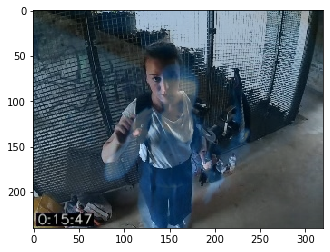

In [10]:
plt.imshow(cv2.cvtColor(imFinal[154], cv2.COLOR_BGR2RGB))

In [ ]:
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi',fourcc, 13.0, (320,240))

for i in range(imFinal.shape[0]):

        # write the flipped frame
        out.write(res[i])

        cv2.imshow('frame',res[i])
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

In [11]:
util.saveVideo(imFinal, 13.0, 320, 240, 'output2.avi')